/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Métricas para LogisticRegression
Matriz de Confusão:
[[408  94  18]
 [ 95 345  45]
 [  4  70 411]]


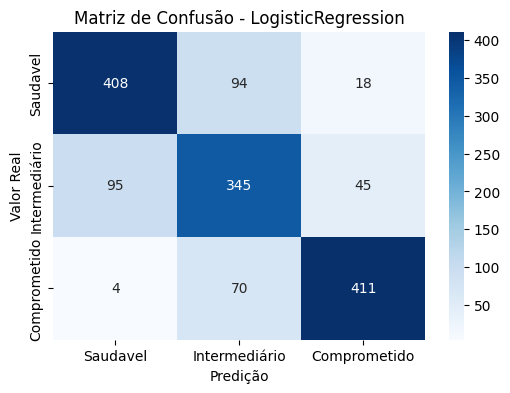

Relatório de Classificação:
              precision    recall  f1-score   support

         1.0       0.80      0.78      0.79       520
         2.0       0.68      0.71      0.69       485
         3.0       0.87      0.85      0.86       485

    accuracy                           0.78      1490
   macro avg       0.78      0.78      0.78      1490
weighted avg       0.78      0.78      0.78      1490

AUC-ROC (micro-média): 0.9302846718616279


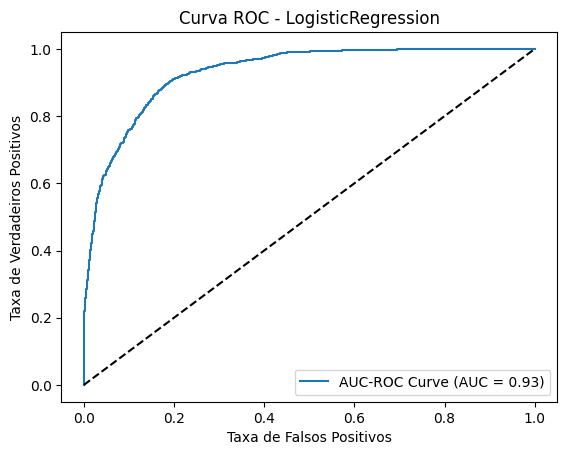


Métricas para DecisionTreeClassifier
Matriz de Confusão:
[[487  29   4]
 [ 36 445   4]
 [  5   8 472]]


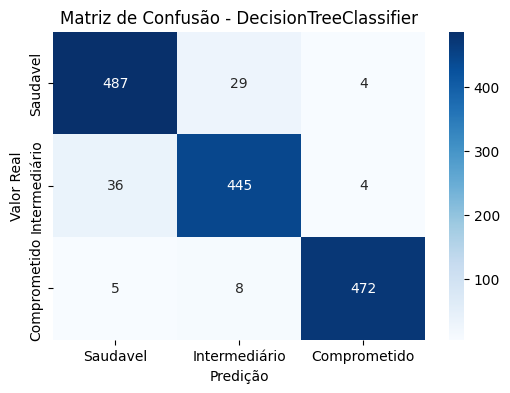

Relatório de Classificação:
              precision    recall  f1-score   support

         1.0       0.92      0.94      0.93       520
         2.0       0.92      0.92      0.92       485
         3.0       0.98      0.97      0.98       485

    accuracy                           0.94      1490
   macro avg       0.94      0.94      0.94      1490
weighted avg       0.94      0.94      0.94      1490

AUC-ROC (micro-média): 0.956711409395973


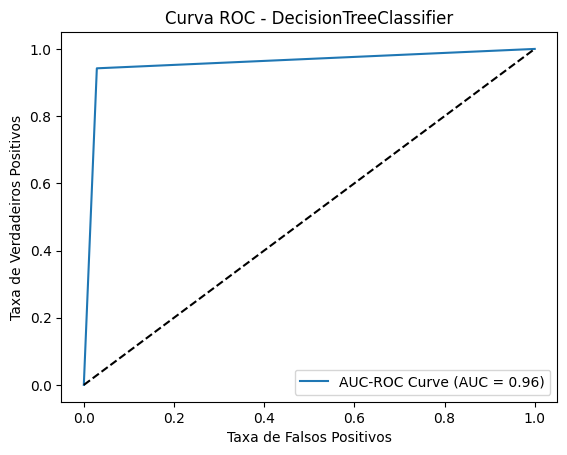


Métricas para MLPClassifier
Matriz de Confusão:
[[436  67  17]
 [ 49 408  28]
 [  6  21 458]]


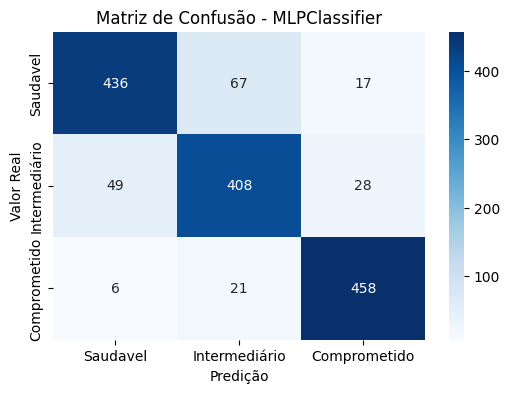

Relatório de Classificação:
              precision    recall  f1-score   support

         1.0       0.89      0.84      0.86       520
         2.0       0.82      0.84      0.83       485
         3.0       0.91      0.94      0.93       485

    accuracy                           0.87      1490
   macro avg       0.87      0.87      0.87      1490
weighted avg       0.87      0.87      0.87      1490

AUC-ROC (micro-média): 0.973091977838836


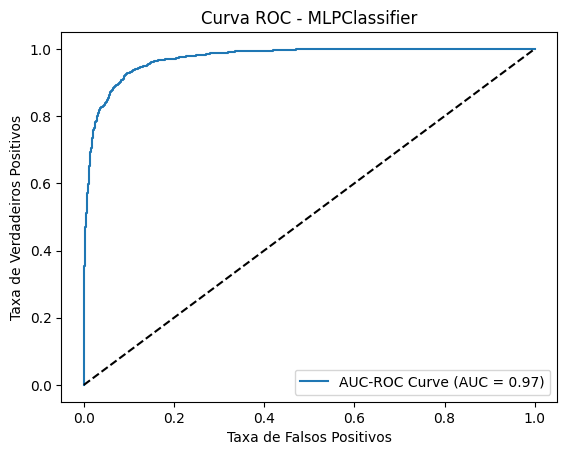


Resultados Comparativos entre Modelos:
LogisticRegression: AUC-ROC = 0.9303, F1-score Minor Class = 0.6942
DecisionTreeClassifier: AUC-ROC = 0.9567, F1-score Minor Class = 0.9204
MLPClassifier: AUC-ROC = 0.9731, F1-score Minor Class = 0.8318

Melhor modelo: MLPClassifier com AUC-ROC = 0.9731 e F1-score Minor Class = 0.8318


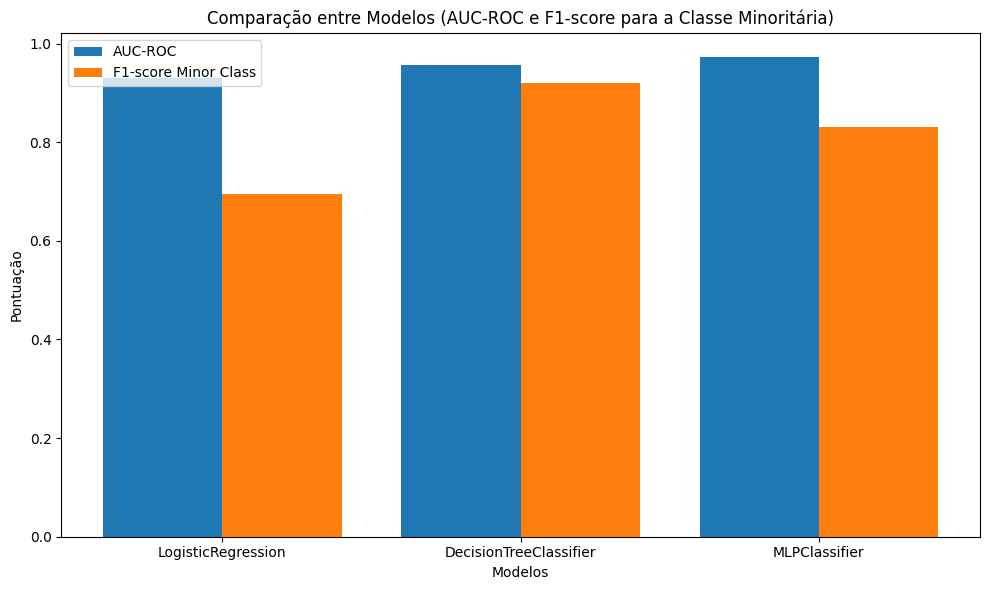

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np
from sklearn.neural_network import MLPClassifier

# Função para calcular e exibir métricas de avaliação
def evaluate_model(X, y, model):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    model.fit(X_train, y_train)

    # Predição e Probabilidades
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test) if hasattr(model, "predict_proba") else y_pred

    # Matriz de Confusão
    cm = confusion_matrix(y_test, y_pred)
    print(f"\nMétricas para {type(model).__name__}")
    print("Matriz de Confusão:")
    print(cm)

    # Gráfico da Matriz de Confusão
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Saudavel", "Intermediário", 'Comprometido'], yticklabels=["Saudavel", "Intermediário", 'Comprometido'])
    plt.xlabel("Predição")
    plt.ylabel("Valor Real")
    plt.title(f"Matriz de Confusão - {type(model).__name__}")
    plt.show()

    # Relatório de Classificação
    print("Relatório de Classificação:")
    report = classification_report(y_test, y_pred, output_dict=True)
    print(classification_report(y_test, y_pred))

    # AUC-ROC para problemas multiclasse
    y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
    n_classes = y_test_bin.shape[1]


    if hasattr(model, "predict_proba"):
        y_score = y_proba
    else:
        y_score = label_binarize(y_pred, classes=np.unique(y_test))

    # Calcular a curva ROC e AUC para cada classe
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Calcular a AUC micro-média (calculando as contagens totais de TP, FP, TN, FN)
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Exibir AUC micro-média
    print("AUC-ROC (micro-média):", roc_auc["micro"])

    # Curva ROC
    plt.figure()
    plt.plot(fpr["micro"], tpr["micro"], label="AUC-ROC Curve (AUC = {:.2f})".format(roc_auc["micro"]))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("Taxa de Falsos Positivos")
    plt.ylabel("Taxa de Verdadeiros Positivos")
    plt.title(f"Curva ROC - {type(model).__name__}")
    plt.legend(loc="lower right")
    plt.show()

    # Retornar métricas relevantes para comparação
    minor_class_key = str(list(report.keys())[1])  # Get the second key (index 1), which should be '1' in most cases, and convert it to a string
    f1_minor_class = report[minor_class_key]["f1-score"]  # F1-score for the minor class
    return roc_auc, f1_minor_class

# Carregar dados e verificar a distribuição original
data = pd.read_csv("fetal_health.csv")
target = 'fetal_health'

# Preparar variáveis independentes e dependentes
X = data.drop(target, axis=1)
y = data[target]

# Aplicar SMOTE para balancear as classes
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Modelos a serem comparados
models = [LogisticRegression(), DecisionTreeClassifier(), MLPClassifier(max_iter=500)]
results = {}

# Avaliar cada modelo
for model in models:
    roc_auc, f1_score_minor = evaluate_model(X_res, y_res, model)
    results[type(model).__name__] = {
        "AUC-ROC": roc_auc,
        "F1-score Minor Class": f1_score_minor
    }

# Exibir resultados comparativos
print("\nResultados Comparativos entre Modelos:")
for model_name, metrics in results.items():
  print(f"{model_name}: AUC-ROC = {metrics['AUC-ROC']['micro']:.4f}, F1-score Minor Class = {metrics['F1-score Minor Class']:.4f}")

# Identificar o melhor modelo com base em AUC-ROC e F1-score
best_model = max(results, key=lambda x: (results[x]["AUC-ROC"]['micro'], results[x]["F1-score Minor Class"]))  # Access the 'micro' key for AUC-ROC
print(f"\nMelhor modelo: {best_model} com AUC-ROC = {results[best_model]['AUC-ROC']['micro']:.4f} e F1-score Minor Class = {results[best_model]['F1-score Minor Class']:.4f}")

# Gráfico Comparativo dos Resultados
model_names = list(results.keys())
auc_scores = [results[model]["AUC-ROC"]['micro'] for model in model_names] # Extract 'micro' AUC for each model
f1_scores = [results[model]["F1-score Minor Class"] for model in model_names]

plt.figure(figsize=(10, 6))
x = range(len(model_names))
plt.bar([p - 0.2 for p in x], auc_scores, width=0.4, label='AUC-ROC', align='center')
plt.bar([p + 0.2 for p in x], f1_scores, width=0.4, label='F1-score Minor Class', align='center')
plt.xticks(x, model_names)
plt.xlabel("Modelos")
plt.ylabel("Pontuação")
plt.title("Comparação entre Modelos (AUC-ROC e F1-score para a Classe Minoritária)")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()